# Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract Data

In [4]:
final_data = pd.read_csv('DataLoad/final_data.csv')
final_data = final_data.drop(columns=['Unnamed: 0'])
selected_country = final_data[final_data['country_name'].isin(['Indonesia', 'Philippines', 'Vietnam'])]
selected_country = selected_country[selected_country['year'].isin([2010,2011,2012,2013,2014,2015])]
selected_country = selected_country.reset_index(drop=True)
selected_country

,country_name,year,population,gdp,rural_population_percent,electricity_access_percent,project_cost,gdp_per_capita
0,Indonesia,2010,0.032577,0.009542,0.505708,0.941494,0.196852,0.162782
1,Indonesia,2011,0.032996,0.011284,0.496957,0.948295,0.114031,0.191067
2,Indonesia,2012,0.033418,0.011599,0.488339,0.959996,0.223941,0.194007
3,Indonesia,2013,0.033833,0.011531,0.479854,0.964639,0.040878,0.190401
4,Indonesia,2014,0.034239,0.011257,0.471514,0.970097,0.039597,0.183458
5,Indonesia,2015,0.034633,0.010878,0.463307,0.975371,0.014183,0.174998
6,Philippines,2010,0.012611,0.002522,0.557561,0.840334,0.016261,0.109226
7,Philippines,2011,0.012829,0.002832,0.560204,0.851711,0.023200,0.121207
8,Philippines,2012,0.013049,0.003160,0.562503,0.863209,0.014034,0.133546
9,Philippines,2013,0.013269,0.003435,0.564468,0.874987,0.022648,0.143168


#### Correlation

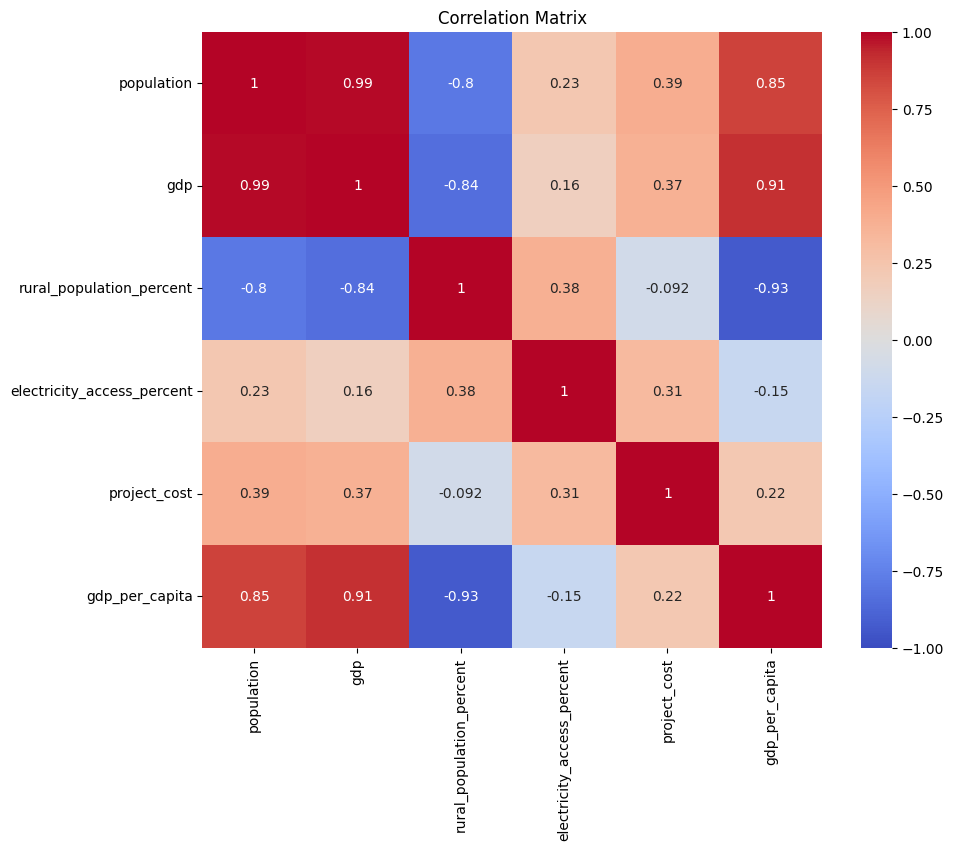

In [25]:
# Analisis Korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = selected_country.drop(columns=['country_name','year']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.savefig('image/correlation_matrix.png', dpi=300)
plt.show()


#### Distribution

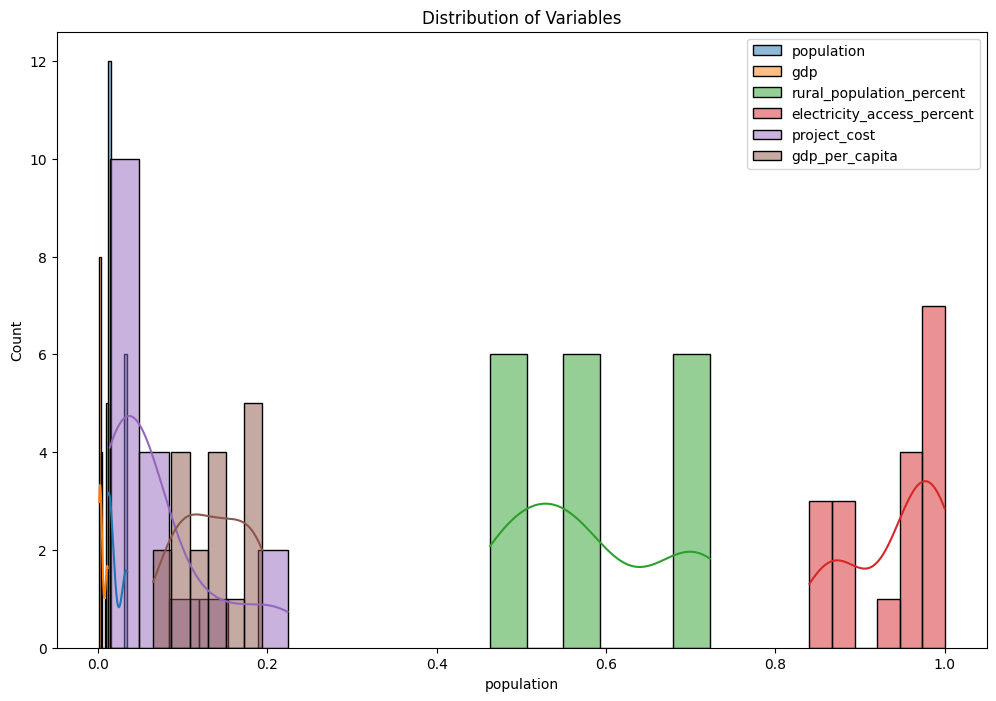

In [26]:
# Analisis Distribusi
plt.figure(figsize=(12, 8))
for column in ['population', 'gdp', 'rural_population_percent', 'electricity_access_percent', 'project_cost', 'gdp_per_capita']:
    sns.histplot(selected_country[column], kde=True, label=column)
plt.legend()
plt.title('Distribution of Variables')
plt.savefig('image/Distribution of Variables.png', dpi=300)
plt.show()


#### Tren

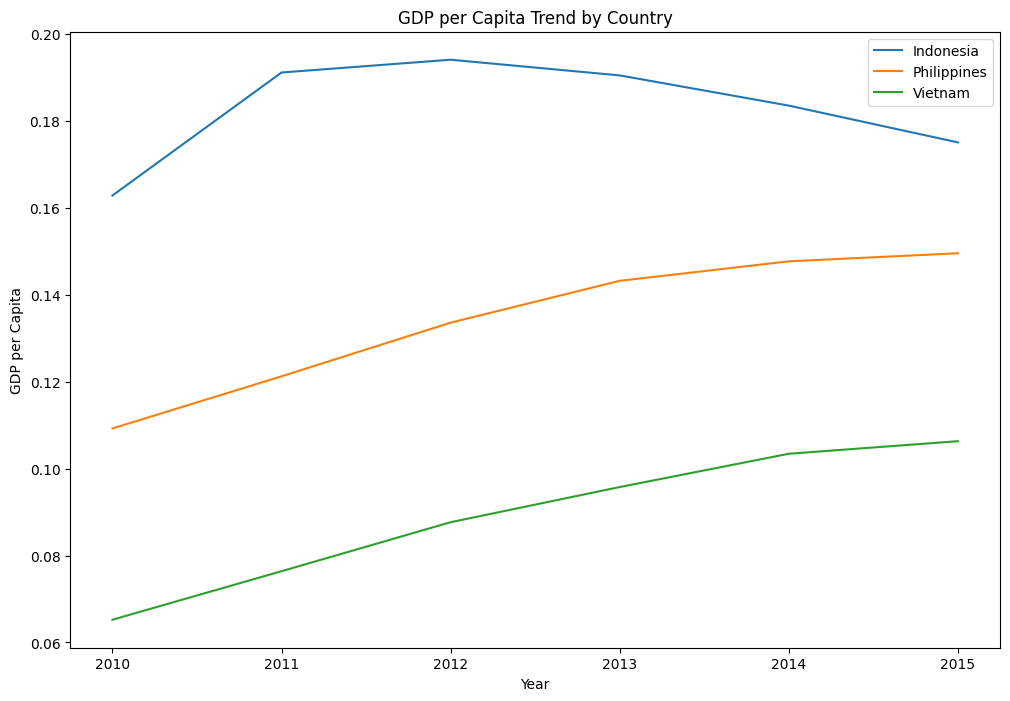

In [27]:
# Analisis Tren
plt.figure(figsize=(12, 8))
for country in selected_country['country_name'].unique():
    subset = selected_country[selected_country['country_name'] == country]
    plt.plot(subset['year'], subset['gdp_per_capita'], label=country)
plt.legend()
plt.title('GDP per Capita Trend by Country')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.savefig('image/tren_graphic.png', dpi=300)
plt.show()


#### Perbandingan

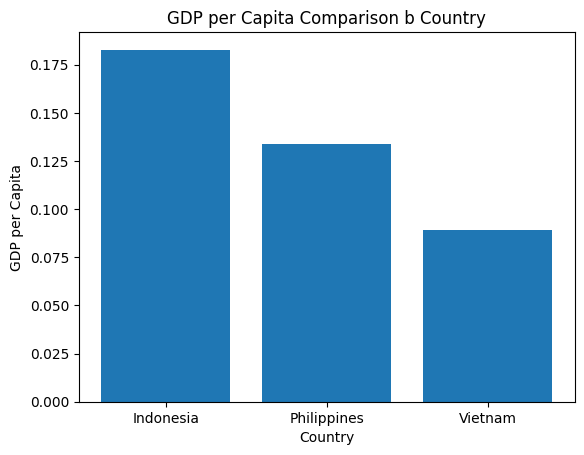

In [14]:
# Analisis Perbandingan
gdp = selected_country.groupby(["country_name"]).mean()
gdp_by_country = gdp['gdp_per_capita']
country = gdp.index.get_level_values(0).to_list()

plt.title("GDP per Capita Comparison b Country")
plt.xlabel("Country")
plt.ylabel("GDP per Capita")

plt.bar(country, gdp_by_country)
plt.savefig('image/comparison_graphic.png', dpi=300)
plt.show()